In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nlp_class/complete_lyrics_dataset.csv")

In [ ]:
df.head(3000)

genre  ...                                             lyrics
0     Country  ...  The older I get The more I think You only get ...
1     Country  ...   Well way down yonder on the Chattahoochee It ...
2     Country  ...   The sun is hot and that old clock is movin' s...
3     Country  ...   Remember when I was young and so were you And...
4     Country  ...   It was painted red, the stripe was white It w...
...       ...  ...                                                ...
2995     Rock  ...   Sometimes I feel like I don't have a partner ...
2996     Rock  ...   Can't stop, addicted to the shindig Chop Top,...
2997     Rock  ...   Scar tissue that I wish you saw Sarcastic mis...
2998     Rock  ...   How long, how long will I slide? Well, separa...
2999     Rock  ...   Come to decide that the things that I tried W...

[3000 rows x 4 columns]

In [ ]:
df.dropna(inplace=True)

For a few cells below the datasets in right format are generated. for our dataset you don't have to run those cells because the txt files are already in the zip of the project.
**NOTE: PREPRO.TXT IS FOR THE WHOLE DATASET WITH 7 LYRICS, 4Genre_lyrics.txt is for the 4-class classification and binaryGenre.txt for the binary one**

**HERE THE BINARY DATASET OF THE WHOLE DATASET IS GENERATED**

In [ ]:
df.loc[df.genre == 'Metal', 'genre'] = 1
print(df.loc[df.genre == 1])
df.loc[df.genre != 1, 'genre'] = 0
print(df)
df = df.iloc[200:1900]
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
essential_df = df.drop(["artist","song names"],axis = 1)
#enc = LabelEncoder()
#essential_df["genre"] = enc.fit_transform(essential_df.genre)
essential_df.to_csv("binaryGenre.txt",header = False,index = False,sep = "\t")

    genre  ...                                             lyrics
420     1  ...  Before the story begins Is it such a sin For m...
421     1  ...   Never feared for anything Never shamed but ne...
422     1  ...   So I arrived, naked and cold A welcomed chang...
423     1  ...   Nightmare! Now your nightmare comes to life  ...
424     1  ...   He who makes a beast out of himself Gets rid ...
..    ...  ...                                                ...
935     1  ...   In this world you tried Not leaving me alone ...
936     1  ...   Carry on your fire and raise your head And ev...
937     1  ...   Birds and butterflies Rivers and mountains sh...
938     1  ...   I paid my dues all for truth Can't leave it h...
939     1  ...   Would you mind if I hurt you? Understand that...

[520 rows x 4 columns]
     genre  ...                                             lyrics
0        0  ...  The older I get The more I think You only get ...
1        0  ...   Well way down yonder on the Chat

In [ ]:
print(df['artist']) 

0       Alan Jackson
1       Alan Jackson
2       Alan Jackson
3       Alan Jackson
4       Alan Jackson
            ...     
3149              U2
3150              U2
3151              U2
3152              U2
3153              U2
Name: artist, Length: 3154, dtype: object


In [ ]:
print("Length of dataframe: ", len(df))

Length of dataframe:  3154


**HERE THE BINARY DATASET OF THE WHOLE DATASET WITH EXTRA METAL SONGS IS GENERATED**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nlp_class/newlyrics_dataset.csv")

In [ ]:
df.loc[df.genre == 'Metal', 'genre'] = 1
print(df.loc[df.genre == 1])
df.loc[df.genre != 1, 'genre'] = 0
print(df)

import pandas as pd 
from sklearn.preprocessing import LabelEncoder
essential_df = df.drop(["artist","song names"],axis = 1)
#enc = LabelEncoder()
#essential_df["genre"] = enc.fit_transform(essential_df.genre)
essential_df.to_csv("binaryGenre_newlyrics.txt",header = False,index = False,sep = "\t")

     genre  ...                                             lyrics
420      1  ...  Before the story begins. Is it such a sin. For...
421      1  ...   Never feared for anything. Never shamed but n...
422      1  ...   So I arrived, naked and cold. A welcomed chan...
423      1  ...   Nightmare!. Now your nightmare comes to life....
424      1  ...   He who makes a beast out of himself. Gets rid...
...    ...  ...                                                ...
1412     1  ...   Now darkness has come to the roses. The fire ...
1413     1  ...   Every word you're saying is a lie. Run away m...
1414     1  ...   Give me strength to face the truth, the doubt...
1415     1  ...   You live your life, you go day by day. Like n...
1416     1  ...   The child without a name grew up to be the ha...

[997 rows x 4 columns]
     genre  ...                                             lyrics
0        0  ...  The older I get. The more I think. You only ge...
1        0  ...   Well way down yonder

**HERE THE 4GENRE DATASET IS GENERATED**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nlp_class/4genres_lyrics_dataset.csv")

In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
essential_df = df.drop(["artist","song names"],axis = 1)
enc = LabelEncoder()
essential_df["genre"] = enc.fit_transform(essential_df.genre)
essential_df.to_csv("4Genre_lyrics.txt",header = False,index = False,sep = "\t")

EDA IN THE ORIGINAL DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3152 entries, 0 to 3153
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       3152 non-null   object
 1   artist      3152 non-null   object
 2   song names  3152 non-null   object
 3   lyrics      3152 non-null   object
dtypes: object(4)
memory usage: 123.1+ KB


In [ ]:
df.describe()

genre  ...                                             lyrics
count    3152  ...                                               3152
unique      7  ...                                               3071
top     Metal  ...   Get out of your own way, hey, hey Get out of ...
freq      518  ...                                                  2

[4 rows x 4 columns]

In [ ]:
print("NaN entries:\n",df.isnull().sum())

NaN entries:
 genre         0
artist        0
song names    0
lyrics        0
dtype: int64


In [ ]:
print("genres: ", df["genre"].unique())

genres:  ['Country' 'Metal' 'Pop' 'Punk' 'Rap' 'Reggae' 'Rock']


Text(0, 0.5, 'Genre')

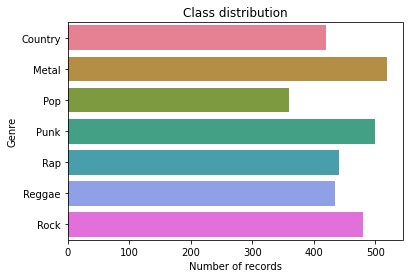

In [ ]:
import seaborn as sns

cntplot = sns.countplot(y="genre", data=df, palette='husl')
cntplot.set_title("Class distribution")
cntplot.set_xlabel("Number of records")
cntplot.set_ylabel("Genre")


In [ ]:
df['genre'].value_counts()


Metal      518
Punk       500
Rock       480
Rap        440
Reggae     435
Country    420
Pop        359
Name: genre, dtype: int64

In [ ]:
df.isnull().sum()

genre         0
artist        0
song names    0
lyrics        0
dtype: int64

In [ ]:
df['totalwords'] = [len(x.split()) for x in df['lyrics'].tolist()]

In [ ]:
display(df)

genre  ... totalwords
0     Country  ...        224
1     Country  ...        365
2     Country  ...        366
3     Country  ...        189
4     Country  ...        446
...       ...  ...        ...
3149     Rock  ...        240
3150     Rock  ...        172
3151     Rock  ...        326
3152     Rock  ...        260
3153     Rock  ...        191

[3152 rows x 5 columns]

In [ ]:
# check average word count per song

mean = df['totalwords'].mean()  
print(int(mean))

341


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



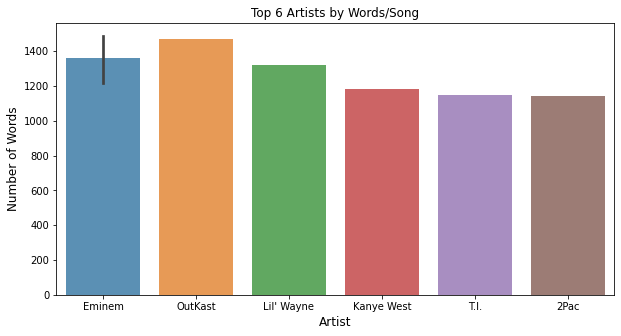

In [ ]:
sort_df = df.sort_values('totalwords',ascending=False)
sort_df = sort_df.iloc[0:9,]


plt.figure(figsize=(10,5))
sns.barplot(sort_df.artist, (sort_df.totalwords), alpha=0.8)
plt.title('Top 6 Artists by Words/Song')
plt.ylabel('Number of Words', fontsize=12)
plt.xlabel('Artist', fontsize=12)
plt.show()


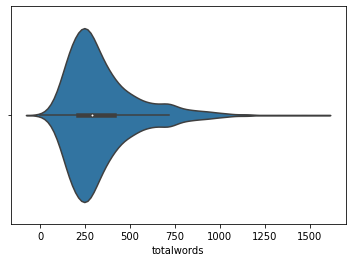

In [ ]:
import seaborn as sns
sns.violinplot(x=df["totalwords"])


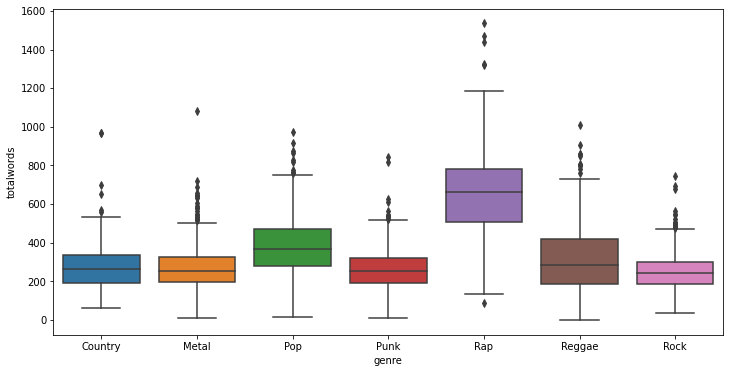

In [ ]:
import matplotlib as mpl
mpl.rc("figure", figsize=(12, 6))
sns.boxplot(x="genre", y="totalwords", data=df)

In [ ]:
print(df['lyrics'].iloc[3000])


 Standing in line to see the show tonight And there's a light on, heavy glow By the way, I tried to say I'd be there waiting for Dani, the girl, is singing songs to me Beneath the marquee, overload  Steak knife, card shark Con job, boot cut Skin that flick, she's such a little DJ To get there quick by street but not the freeway Turn that trick to make a little leeway Beat that nic, but not the way that we play Dogtown, blood bath Rib cage, soft tail  Standing in line to see the show tonight And there's a light on, heavy glow By the way, I tried to say I'd be there waiting for  Black jack, dope dick Pawn shop, quick pick Kiss that dyke, I know you want to hold one Not on strike but I'm about to bowl one Bite that mic, I know you never stole one Girls that like a story, so I told one Song bird, main line Cash back, hard top Standing in line to see the show tonight And there's a light on, heavy glow By the way, I tried to say I'd be there waiting for Dani, the girl, is singing songs to me

In [ ]:
import nltk
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['tokens'] = df['lyrics'].map(tokenizer.tokenize)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


In [ ]:
stemmer = nltk.stem.porter.PorterStemmer()
lemmat = WordNetLemmatizer()
# create dictionary to map tokens their stem
token_to_lem = {}
# initialise word count
token_count = 0
# iterate through all songs
for lst in df['tokens']:
    # iterate through all tokens of song
    for token in lst:
        token_count += 1
        # check if token is in dictionary
        if token not in token_to_lem:
            # add token to dictionary
            token_to_lem[token] = lemmat.lemmatize(token)
            
df['lem'] = df['tokens'].map(lambda lst: [token_to_lem[token] for token in lst])

print('Number of tokens: {}'.format(token_count))
print('Number of unique tokens: {}'.format(len(token_to_lem.keys())))
print('Number of unique stems: {}'.format(len(set(token_to_lem.values()))))

Number of tokens: 1145581
Number of unique tokens: 38867
Number of unique stems: 36310


In [ ]:
# number of songs
print('number of songs: ', str(len(df)))

# number of artists
print('number of artists: ', str(len(df['artist'].unique())))

number of songs:  3152
number of artists:  154


In [ ]:
df['lem'] = [' '.join(map(str, l)) for l in df['lem']]


In [ ]:
df

genre  ...                                                lem
0     Country  ...  The older I get The more I think You only get ...
1     Country  ...  Well way down yonder on the Chattahoochee It g...
2     Country  ...  The sun is hot and that old clock is movin slo...
3     Country  ...  Remember when I wa young and so were you And t...
4     Country  ...  It wa painted red the stripe wa white It wa 18...
...       ...  ...                                                ...
3149     Rock  ...  If you twist and turn away If you tear yoursel...
3150     Rock  ...  You say you want Diamonds on a ring of gold Yo...
3151     Rock  ...  Blessed are the bully For one day they will ha...
3152     Rock  ...  I wa chasing down the day of fear Chasing down...
3153     Rock  ...  Morning your toast your tea and sugar Read abo...

[3152 rows x 7 columns]

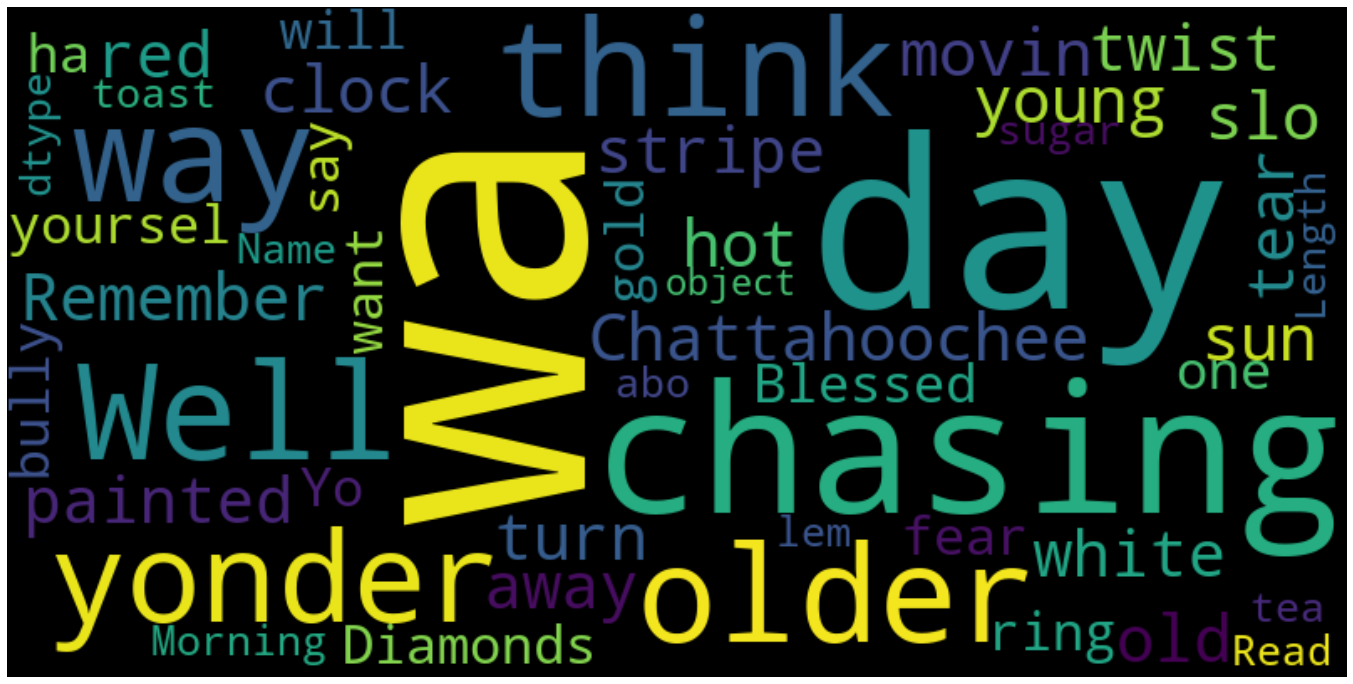

In [ ]:
import wordcloud
from wordcloud import WordCloud

wc = WordCloud(random_state=0, max_words=200, width=800, height=400).generate(str(df["lem"].str.replace('\n','')))
plt.figure(figsize=(24,16))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# words per song
df['n_lem'] = df['lem'].map(len)

fig = px.histogram(df, x='n_lem', title='Words per song')
fig.show()

In [ ]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['lem'] = [' '.join(map(str, l)) for l in df['lem']]
df['lem'] = df['lem'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df['lem'] = df['lem'].str.findall('\w{4,}').str.join(' ')
#df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#df['lyrics'] = df['lyrics'].str.findall('\w{3,}').str.join(' ')

display(df)
cv = CountVectorizer(lowercase=True, min_df=0.01, max_df=0.6)
tfidf = TfidfVectorizer(lowercase=True, min_df=0.01, max_df=0.6)

# get vectors

count_vecs = cv.fit_transform(df['lem']).toarray()

lyric_features = tfidf.fit_transform(df['lyrics']).toarray()


genre  ... n_lem
0     Country  ...   241
1     Country  ...   371
2     Country  ...   410
3     Country  ...   198
4     Country  ...   463
...       ...  ...   ...
3149     Rock  ...   249
3150     Rock  ...   175
3151     Rock  ...   338
3152     Rock  ...   265
3153     Rock  ...   205

[3152 rows x 8 columns]

In [ ]:
type(df['lem'].values)

numpy.ndarray

In [ ]:
n_topics = 7
n_words = 5

lda = LatentDirichletAllocation(n_components=n_topics, n_jobs=-1)
lda_lyric_features = lda.fit_transform(count_vecs)

print("Topics found via LDA:")
print_topics(lda, cv, n_words)


Topics found via LDA:

Topic #0:
come baby wanna like little

Topic #1:
yeah like know want gonna

Topic #2:
know world never life take

Topic #3:
right time want fire hear

Topic #4:
love know girl like time

Topic #5:
like nigga fuck shit bitch

Topic #6:
away what could life when


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Just run this cell once to download and unzip the glove embeddings in your drive

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-01-08 19:22:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-01-08 19:22:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-08 19:22:13--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

change directory in your drive where the code (and embeddings) are stored

In [ ]:
%cd /content/drive/My\ Drive/nlp_class/textClassifier-master/

/content/drive/My Drive/nlp_class/textClassifier-master


install requirements

In [ ]:
!pip install -r req.txt


     |████████████████████████████████| 1.8 MB 6.7 MB/s 
     |████████████████████████████████| 264 kB 56.7 MB/s 
     |████████████████████████████████| 889 kB 48.0 MB/s 
     |████████████████████████████████| 276 kB 34.7 MB/s 
     |████████████████████████████████| 489 kB 53.9 MB/s 
     |████████████████████████████████| 303 kB 59.9 MB/s 
     |████████████████████████████████| 271 kB 47.2 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 1.4 MB 49.6 MB/s 
     |████████████████████████████████| 5.0 MB 37.6 MB/s 
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 10.4 MB 31.1 MB/s 
     |████████████████████████████████| 99 kB 8.9 MB/s 
     |████████████████████████████████| 13.9 MB 172 kB/s 
     |████████████████████████████████| 375 kB 71.1 MB/s 
     |████████████████████████████████| 987 kB 64.6 MB/s 
     |████████████████████████████████| 194 kB 70.1 MB/s 
     |██████████████

train the models below

In [ ]:
!python textClassifierHATT_7Genres.py

27722
Found 27722 unique tokens.
[[1414, 33, 395, 56, 60, 6, 74, 1803, 1414, 7492, 58, 3, 96, 1110, 26, 10, 392, 187, 2954, 373, 371, 260, 209, 657, 20, 213, 116, 149, 1414, 11124, 92, 24, 464, 63, 11, 1414, 56, 1017, 22, 22, 235, 187, 2954, 373, 371, 260, 209, 657, 20, 213, 116, 149, 1414, 47, 168, 210, 5, 2448, 1235, 15176, 32, 393, 12, 1415, 1414, 600, 437, 2, 224, 1414, 2828, 20, 12, 12, 132, 39], [40, 4021, 6657, 2043, 5410, 1883, 1071, 1936, 5909, 5411, 32, 135, 8, 325, 435, 409, 818, 31, 5412, 2519, 1126, 507, 2449, 190, 8, 413, 278, 395, 4, 4021, 6657, 8, 266, 86, 3787, 313, 411, 745, 862, 745, 278, 32, 3, 40, 11125, 438, 3788, 4022, 192, 3789, 3790, 4953, 926, 5910, 1364, 1003, 57, 435, 409, 818, 31, 5412, 2519, 1126, 507, 2449, 190, 8, 413, 278, 395, 4, 4021, 6657, 8, 266, 86, 3787, 313, 411, 745, 862, 745, 278, 32, 3, 40, 4021, 6657, 2043, 5410, 1883, 1071, 1936, 5909, 5411, 32, 135, 8, 325, 40, 11125, 438, 3788, 4022, 192, 3789, 3790, 4953, 926, 5910, 1364, 1003, 57, 435, 4

In [ ]:
!python textClassifierHATT_4Genres.py

17542
Found 17542 unique tokens.
[[1080, 32, 435, 62, 57, 6, 85, 1561, 1080, 5077, 83, 4, 80, 899, 24, 14, 349, 227, 3996, 570, 343, 222, 284, 578, 25, 219, 100, 121, 1080, 9877, 74, 23, 494, 65, 8, 1080, 62, 843, 26, 26, 235, 227, 3996, 570, 343, 222, 284, 578, 25, 219, 100, 121, 1080, 52, 157, 239, 5, 2585, 965, 9878, 29, 422, 13, 1562, 1080, 737, 506, 2, 197, 1080, 3656, 25, 13, 13, 191, 40], [31, 2943, 4450, 1803, 3657, 3658, 986, 1472, 3997, 4451, 29, 111, 10, 322, 383, 408, 934, 35, 3998, 2586, 1109, 436, 1804, 195, 10, 428, 220, 435, 3, 2943, 4450, 10, 240, 82, 3659, 275, 392, 678, 1398, 678, 220, 29, 4, 31, 7353, 397, 2753, 2754, 217, 2755, 2587, 3660, 996, 3999, 1060, 1081, 47, 383, 408, 934, 35, 3998, 2586, 1109, 436, 1804, 195, 10, 428, 220, 435, 3, 2943, 4450, 10, 240, 82, 3659, 275, 392, 678, 1398, 678, 220, 29, 4, 31, 2943, 4450, 1803, 3657, 3658, 986, 1472, 3997, 4451, 29, 111, 10, 322, 31, 7353, 397, 2753, 2754, 217, 2755, 2587, 3660, 996, 3999, 1060, 1081, 47, 383, 408

In [ ]:
!python textClassifierHATT_oldBinary.py

15380
Found 15380 unique tokens.
[[588, 328, 899, 2709, 204, 3953, 6539, 8817, 387, 10, 1725, 418, 2084, 595, 712, 2, 1430, 408, 259, 12, 58, 88, 470, 899, 2709, 595, 267, 12, 58, 408, 259, 228, 1541, 169, 5316, 300, 679, 204, 384, 174, 4501, 1542, 5317, 362, 5318, 2524, 408, 259, 12, 58, 88, 470, 899, 2709, 595, 267, 12, 58, 408, 259, 77, 255, 319, 566, 84, 287, 3195, 58, 17, 872, 259, 104, 28, 58, 531, 531, 408, 259, 12, 58, 88, 470, 899, 2709, 595, 267, 12, 58, 408, 259, 408, 259, 12, 58, 88, 470, 899, 2709, 595, 267, 12, 58, 408, 259, 12, 58, 385, 408, 259, 12, 58, 385, 408, 259], [442, 2525, 2, 24, 2085, 2, 595, 6540, 2, 125, 232, 2, 662, 1019, 2, 5319, 204, 697, 442, 2525, 7, 442, 7, 3, 27, 10, 759, 2086, 935, 57, 7, 3, 7, 3, 27, 10, 7, 3, 7, 3, 442, 2525, 2, 24, 2085, 2, 595, 6540, 2, 125, 232, 2, 662, 1019, 2, 5319, 204, 697, 442, 2525, 7, 442], [2087, 186, 481, 459, 194, 97, 148, 245, 794, 463, 1175, 3954, 4502, 132, 1643, 2921, 376, 1472, 31, 149, 188, 32, 147, 80, 2, 6, 9, 4

In [ ]:
!python textClassifierHATT_newBinary.py

28701
Found 28701 unique tokens.
[[1525, 33, 401, 58, 53, 8, 77, 1762, 1525, 7975, 59, 3, 104, 1227, 28, 12, 417, 195, 2842, 396, 366, 276, 183, 703, 17, 218, 124, 148, 1525, 11755, 97, 24, 486, 63, 13, 1525, 58, 1042, 23, 23, 247, 195, 2842, 396, 366, 276, 183, 703, 17, 218, 124, 148, 1525, 41, 164, 200, 5, 2494, 1228, 15864, 35, 382, 10, 1124, 1525, 575, 386, 2, 235, 1525, 2953, 17, 10, 10, 139, 38], [42, 4312, 7089, 2244, 5812, 2065, 1072, 2019, 5813, 4921, 35, 146, 7, 344, 470, 413, 878, 31, 5332, 1972, 1137, 561, 2495, 205, 7, 447, 292, 401, 4, 4312, 7089, 7, 275, 91, 4072, 295, 431, 645, 933, 645, 292, 35, 3, 42, 11756, 438, 4073, 4313, 172, 3481, 4074, 4922, 883, 5814, 1497, 1052, 60, 470, 413, 878, 31, 5332, 1972, 1137, 561, 2495, 205, 7, 447, 292, 401, 4, 4312, 7089, 7, 275, 91, 4072, 295, 431, 645, 933, 645, 292, 35, 3, 42, 4312, 7089, 2244, 5812, 2065, 1072, 2019, 5813, 4921, 35, 146, 7, 344, 42, 11756, 438, 4073, 4313, 172, 3481, 4074, 4922, 883, 5814, 1497, 1052, 60, 470, 